In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from scipy.optimize import curve_fit
from sklearn import mixture
from matplotlib.colors import LogNorm

from astroML.plotting.tools import draw_ellipse
from xdgmm import XDGMM

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'


In [75]:
def plotXdgmm(xdgmm, c='k', lw=1, label='prior', step=0.001):
    ts = np.arange(0, 2. * np.pi, step) #magic
    amps = xdgmm.weights
    mus = xdgmm.mu
    Vs = xdgmm.V
    for gg in range(xdgmm.n_components):
        if amps[gg] == np.max(amps):
            label=label
        else:
            label=None
        w, v = np.linalg.eigh(Vs[gg])
        points = np.sqrt(w[0]) * (v[:, 0])[:,None] * (np.cos(ts))[None, :] + \
                 np.sqrt(w[1]) * (v[:, 1])[:,None] * (np.sin(ts))[None, :] + \
                 mus[gg][:, None]
        plt.plot(points[0,:], (np.log10(points[1,:])-2)*5., 
                 c, lw=lw, alpha=amps[gg]/np.max(amps), rasterized=True, label=label)

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


(7, -5)

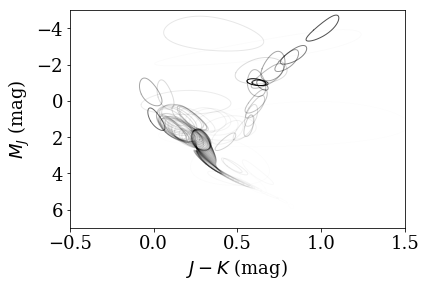

In [84]:
#read in gaussian parameters (from Dr. Lauren Anderson)
xdgmmL = XDGMM(filename='xdgmm.128gauss.dQ0.05.10th.2MASS.All.npz.fit')

plotXdgmm(xdgmmL)

plt.ylabel('$M_J$ (mag)')
plt.xlabel('$J-K$ (mag)')
plt.xlim(-0.5,1.5)

plt.ylim(7,-5)


In [ ]:
# figure out how to do "score samples" from this...

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


(7, -5)

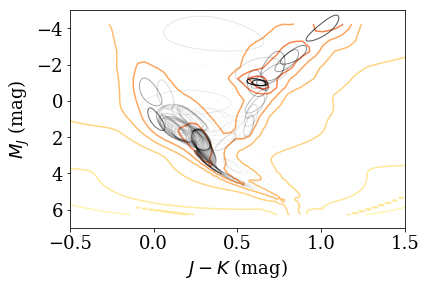

In [86]:

x = np.linspace(-1., 4., 128)
y = np.linspace(0, 1800, 128)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

XXerr = np.zeros([XX.shape[0], XX.shape[1], XX.shape[1]])
logprob, resp = xdgmmL.score_samples(XX, XXerr)

Z = -logprob
Z = Z.reshape(X.shape)


cmap = plt.cm.Spectral
plotXdgmm(xdgmmL)

CS = plt.contour(X, (np.log10(Y)-2.)*5., Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 22), cmap=cmap)

plt.ylabel('$M_J$ (mag)')
plt.xlabel('$J-K$ (mag)')
plt.xlim(-0.5,1.5)
plt.ylim(7,-5)

